In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from matplotlib.ticker import NullFormatter
import pandas as pd 
import matplotlib.ticker as ticker 

%matplotlib inline 

df = pd.read_csv('Telecustomers.csv')
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [2]:
X = df.drop(['custcat'] ,axis = 1)
y = df['custcat']

from sklearn import preprocessing 
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y , test_size = 0.2 , random_state = 4)

from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics 


#Train the model and predict 

k = 4 
neigh = KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)
y_pred = neigh.predict(X_test)
print('Acuracy of the model at k=4' , metrics.accuracy_score(y_test,y_pred))


Acuracy of the model at k=4 0.32


# Find the optimal k value for least error rate 

Minimum Error : -  0.59 at k =  37


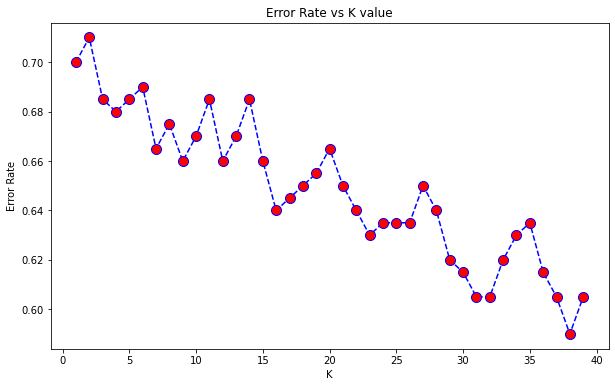

In [3]:
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    pred_i  = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40) , error_rate , color = 'blue' , linestyle = 'dashed' , 
        marker = 'o' , markerfacecolor = 'red' , markersize = 10)
plt.title('Error Rate vs K value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print('Minimum Error : - ' ,min(error_rate) , "at k = " ,error_rate.index(min(error_rate)))

# Finding the optimal k value for highest accuracy

Maximum accuracy:- 0.41 at K = 37


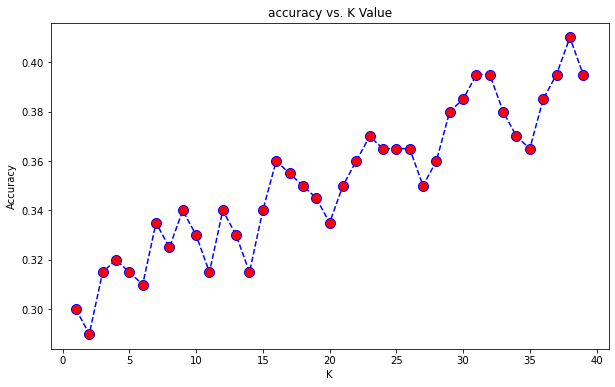

In [4]:
acc = []

from sklearn import metrics

for i in range(1,40):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))